# IBM Advanced Data Science Capstone project.

# Forecasting a Stock Price | Prediction Models for Amazon.com

### Analysis using linear models such as Linear Regression, K-Nearest Neighbor(KNN) and Support Vector Machine(SVM) to using a Time Series Forcasting model like  RNN-LSTM meaning Recurrent Neural Network Long Short Term Memory. 

### From Initial Data Exploration to Model Definition. 

#### The Goal:

In [1]:
print('Working with the historical Data of the company name Amazon.com, which has its equity or stock that trades in the NASDAQ market under the symbol AMZN, my goal is to see how well the Linear models and the RNN-LSTM-Time Series Forecasting model which is a deep learning model can predict the stock price movements.')

Working with the historical Data of the company name Amazon.com, which has its equity or stock that trades in the NASDAQ market under the symbol AMZN, my goal is to see how well the Linear models and the RNN-LSTM-Time Series Forecasting model which is a deep learning model can predict the stock price movements.


#### In this notebook I present the pre-modeling process which includes steps 1 to five from data source to data definition.

#### Install and Import Libraries:

In [1]:
# check the version of the libraries

# python version
import sys
print('Python: {}'.format(sys.version))

Python: 3.7.10 (default, Feb 26 2021, 18:47:35) 
[GCC 7.3.0]


In [2]:
# For ETL
import pandas as pd
import numpy as np
import math
from math import sqrt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot

In [3]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [4]:
# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [5]:
# For Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [6]:
# For measures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [7]:
# For WebScraping
!pip install yfinance

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=3457e20a6fb6b53d628749227488ac933e0a8694d5982abd813a3bb560caf4f8
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=68ce7a4b69021d13926393f6245b50efa90bcd297ad0039e708c8547ee6de4ee
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Succ

In [9]:
# To import raw data
import yfinance as yf

## Module 1: Importing Data Sets

#### Load Dataset:

In [10]:
# Working with AMAZON.COM  
#Total data set starts '2009-04-01' ends '2021-03-31'(3020,7)
#Train data set starts '2009-04-01' ends '2018-03-31'(1812,7)
#Test data set starts '2018-04-01' ends '2021-03-31'(755,7)
#validation data is set at 20 percent (453,7)

ticker = yf.Ticker("AMZN")
data1 = ticker.history(start = "2009-04-01", end = "2021-03-31")
data1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-04-01,73.019997,75.089996,71.709999,73.500000,7041400,0,0
2009-04-02,73.629997,77.239998,73.440002,76.339996,11066900,0,0
2009-04-03,76.419998,78.320000,75.500000,78.169998,5809900,0,0
2009-04-06,77.260002,78.360001,76.000000,77.989998,5751300,0,0
2009-04-07,76.970001,77.080002,74.879997,75.510002,5748800,0,0


In [11]:
data1.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,2959000,0,0
2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3563500,0,0
2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3306700,0,0
2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,2746000,0,0
2021-03-30,3070.010010,3073.000000,3034.000000,3055.290039,2337600,0,0


In [12]:
# dimmension of dataset
data1.shape

(3020, 7)

In [13]:
# Display the data types of each column
data1.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

## Module 2: Data Wrangling

#### Data Cleaning:

In [14]:
# Data cleaning # Removing dividends column and stock split column

data1.reset_index(inplace=True)
df = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Date'] = data1['Date']
df['Open'] = data1['Open']
df['High'] = data1['High']
df['Low'] = data1['Low']
df['Close'] = data1['Close']
df['Volume'] = data1['Volume']
df.head()

,Date,Open,High,Low,Close,Volume
0,2009-04-01,73.019997,75.089996,71.709999,73.500000,7041400
1,2009-04-02,73.629997,77.239998,73.440002,76.339996,11066900
2,2009-04-03,76.419998,78.320000,75.500000,78.169998,5809900
3,2009-04-06,77.260002,78.360001,76.000000,77.989998,5751300
4,2009-04-07,76.970001,77.080002,74.879997,75.510002,5748800


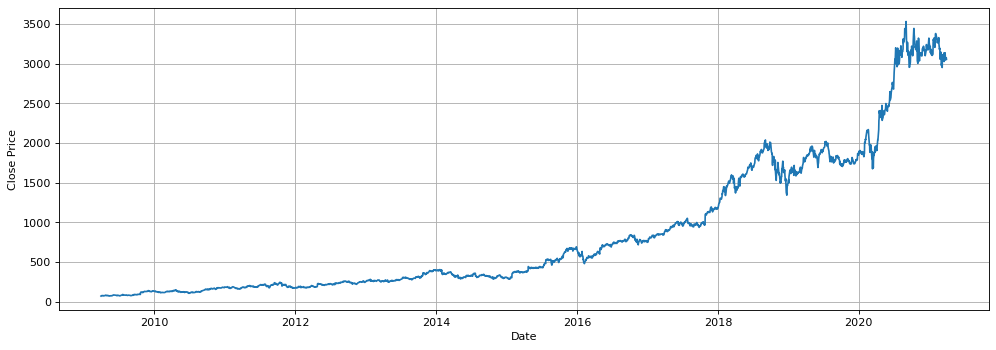

In [15]:
#Visualize the data
# The recent steep drop on the chart was about covid-19,March of 2020
# Plot starts '2009-04-01' ends '2021-03-31'
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data1['Date'],data1['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()

In [16]:
# statistical summary of dataset
df.describe()

,Open,High,Low,Close,Volume
count,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03
mean,857.271172,866.373522,846.929987,856.993414,4.764370e+06
std,869.753037,879.527268,858.165551,868.878627,3.089278e+06
min,73.019997,75.089996,71.709999,73.500000,8.813000e+05
25%,217.407497,219.577503,214.312500,217.450001,2.917250e+06
50%,398.070007,399.850006,393.130005,397.600006,4.008150e+06
75%,1488.180023,1521.279999,1475.910004,1495.932556,5.657050e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,5.830580e+07


## Module 3 & 4: Feature Engineering - Exploratory Data Analysis

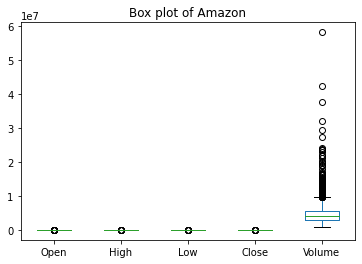

In [17]:
# looking at the unvariate plots to better understand each attribute.
# box plot
df.plot(kind='box', subplots=False, layout=(2,2), sharex=False, sharey=False)
plt.title('Box plot of Amazon')
pyplot.show()

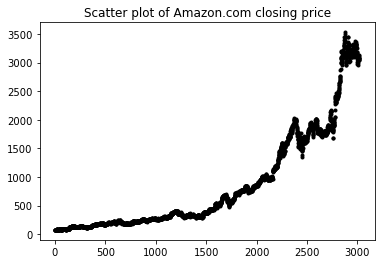

In [18]:
# Plot the stock price evolution overtime
# scatter plot
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of Amazon.com closing price')
plt.show()

#### Measuring Correlation:

In [19]:
print('The range of value for Pearson Correlation is between -1 to 1.  It is a popular way of measuring for correlation.  If two      features are positively correlated then they are directly proportional and if they are negatively correlated then they are     inversly proportional.')

The range of value for Pearson Correlation is between -1 to 1.  It is a popular way of measuring for correlation.  If two      features are positively correlated then they are directly proportional and if they are negatively correlated then they are     inversly proportional.


In [20]:
# Check for correlation by Pearson Method
corr = df.corr(method = 'pearson')
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999892,0.999852,0.999742,-0.097273
High,0.999892,1.000000,0.999819,0.999871,-0.094226
Low,0.999852,0.999819,1.000000,0.999882,-0.101377
Close,0.999742,0.999871,0.999882,1.000000,-0.097886
Volume,-0.097273,-0.094226,-0.101377,-0.097886,1.000000


In [21]:
print('Let us use the Pearson Correlation Map to better understand feature correlation which is high.')

Let us use the Pearson Correlation Map to better understand feature correlation which is high.


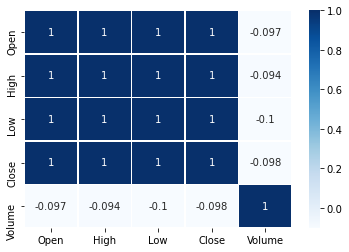

In [22]:
# Pearson correlation map
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', annot=True, linewidth=0.5)

##### Plot Cross-correlation

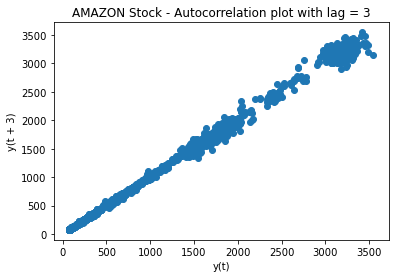

In [23]:
# looking for cross-correlation in out data
# A lag plot can provide clues about the underlying structure of the data
plt.figure
lag_plot(df['Open'], lag=3)
plt.title('AMAZON Stock - Autocorrelation plot with lag = 3')
plt.show()

#### The Rolling Mean (Moving Average)

In [24]:
print("Moving average helps us smooth out data that has a lot of flunctuation and helps us see the long term trend better.")

Moving average helps us smooth out data that has a lot of flunctuation and helps us see the long term trend better.


In [25]:
# Rolling mean also called moving average
# Moving average helps us smooth out data that has lots of fluctuation and helps us see the long tern trend better.
close_px = df['Close']
mavg = close_px.rolling(window=100).mean()

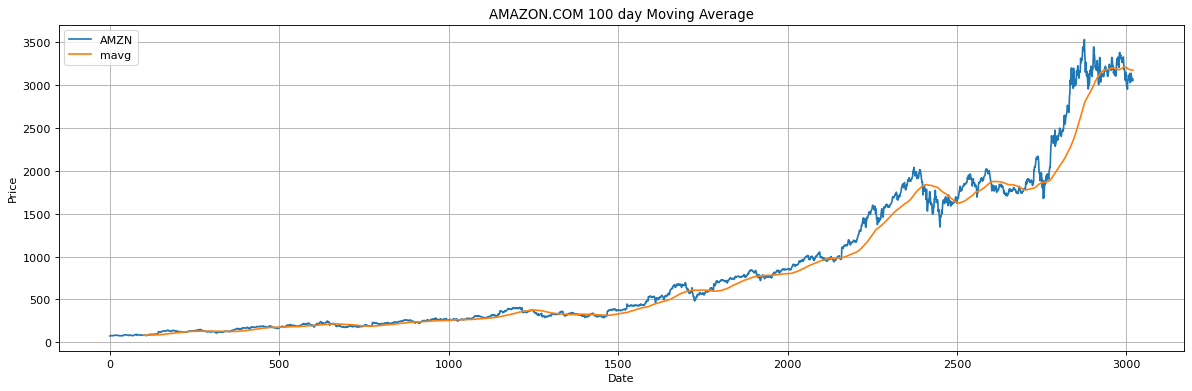

In [26]:
#Visualize the rolling mean
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
close_px.plot(label='AMZN')
mavg.plot(label='mavg')
plt.title("AMAZON.COM 100 day Moving Average")
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

## Module 5: Model Definition

#### Reshape the Data for Linear Models: LinearRegression, K-Nearest Neighbor(KNN), Support Vector Machine(SVM)

In [27]:
# Data reshape 
# Eliminate volume feature which is not important to the models
df1 = df[['Date', 'Open', 'High', 'Low', 'Close']]
df1.head()

,Date,Open,High,Low,Close
0,2009-04-01,73.019997,75.089996,71.709999,73.500000
1,2009-04-02,73.629997,77.239998,73.440002,76.339996
2,2009-04-03,76.419998,78.320000,75.500000,78.169998
3,2009-04-06,77.260002,78.360001,76.000000,77.989998
4,2009-04-07,76.970001,77.080002,74.879997,75.510002


###### Below we will visualize the open price vs the close price.

In [28]:
print("The Open price is the first quote at 9.30am when the equity market is officially openned.  The Close price is the last quote at   4pm when the market is officially closed.  There is pre-market trading which takes place before the open and after-market      trading which takes place after 4pm however those quotes are not reflected here.  The historical market data we are focusing on is based on official market ticks.  ")

The Open price is the first quote at 9.30am when the equity market is officially openned.  The Close price is the last quote at   4pm when the market is officially closed.  There is pre-market trading which takes place before the open and after-market      trading which takes place after 4pm however those quotes are not reflected here.  The historical market data we are focusing on is based on official market ticks.  


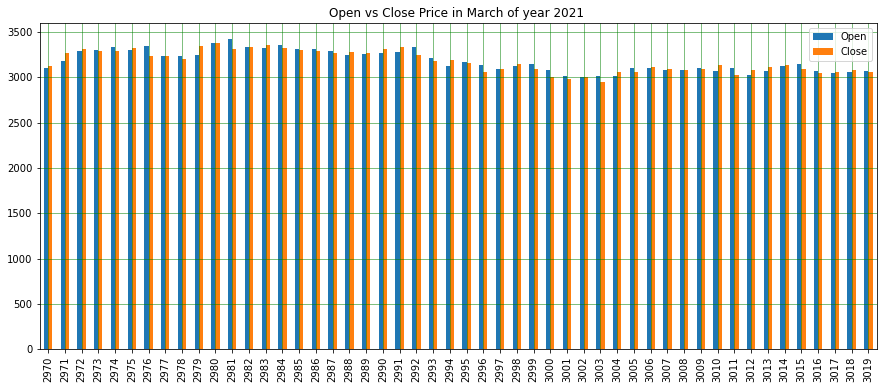

In [29]:
# Plotting the Open vs the Close for AMZN from beginning of chart above at year 2021
df1[['Open', 'Close']].tail(50).plot(kind='bar',figsize=(15, 6))
plt.title("Open vs Close Price in March of year 2021 ")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [30]:
print('To avoid errors the Date format will be changed to separete Year, Month, Day')

To avoid errors the Date format will be changed to separete Year, Month, Day


In [31]:
# To avoid errors the Date format will be changed to separete 'Year', 'Month','Day'
df1['Year'] = df['Date'].dt.year
df1['Month'] = df['Date'].dt.month
df1['Day'] = df['Date'].dt.day

In [32]:
#final dataset
dataset = df1[['Day', 'Month', 'Year', 'High', 'Open', 'Low', 'Close']]
dataset.head()

,Day,Month,Year,High,Open,Low,Close
0,1,4,2009,75.089996,73.019997,71.709999,73.500000
1,2,4,2009,77.239998,73.629997,73.440002,76.339996
2,3,4,2009,78.320000,76.419998,75.500000,78.169998
3,6,4,2009,78.360001,77.260002,76.000000,77.989998
4,7,4,2009,77.080002,76.970001,74.879997,75.510002


In [33]:
dataset.tail()

,Day,Month,Year,High,Open,Low,Close
3015,24,3,2021,3160.310059,3151.040039,3085.149902,3087.070068
3016,25,3,2021,3109.780029,3072.989990,3037.139893,3046.260010
3017,26,3,2021,3056.659912,3044.060059,2996.000000,3052.030029
3018,29,3,2021,3091.250000,3055.439941,3028.449951,3075.729980
3019,30,3,2021,3073.000000,3070.010010,3034.000000,3055.290039


##### Spliting the data into training set and test set

In [34]:
# Separate data as independent and dependent variables
X = dataset.iloc[:,dataset.columns !='Close']
y = dataset.iloc[:, 5]

print(X.shape)
print(y.shape)

(3020, 6)
(3020,)


In [35]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2265, 6)
(2265,)
(755, 6)
(755,)


###### Next, is building and evaluating models.

In [2]:
print("The next two files in order of viewing are: Forecasting a Stock Price Linear Models, Forecasting a Stock Price LSTM Model.")

The next two files in order of viewing are: Forecasting a Stock Price Linear Models, Forecasting a Stock Price LSTM Model.
